# Homework Assignment 1: Clustering
### Andre Schweizer

### Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.cm as cm
import plotly.graph_objs as go
from plotly import tools

%matplotlib inline


import math
import os

from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from __future__ import print_function

from scipy.spatial.distance import cdist

from collections import Counter

### Open data file

In [2]:
# Please insert your working directory here and make sure you have the file downloaded. File can be found here:
# https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier2016.html
os.chdir('/Users/andreschweizer/Documents/2019W/IEMS 308/Clustering/Medicare-Physician-and-Other-Supplier-PUF')
data = pd.read_table('Medicare_Provider_Util_Payment_PUF_CY2016.txt')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



### Cleaning data

In [3]:
# Remove rows that have NaN for number of services
data1 = data[pd.notnull(data['BENE_DAY_SRVC_CNT'])]

In [4]:
# Remove rows that have NaN for submitted charge
data2 = data1[pd.notnull(data1['AVERAGE_SUBMITTED_CHRG_AMT'])]

In [5]:
# Keep only IL data
data3 = data2.loc[data2['NPPES_PROVIDER_STATE'] == 'IL']

In [6]:
# Keep only data to be used
df = data3[['BENE_DAY_SRVC_CNT','AVERAGE_SUBMITTED_CHRG_AMT']].copy()

### Pre-processing

In [7]:
### Normalize the data
# Turn data frame into  array for easier handling
dfarray = df.values

In [8]:
# Find the column means
dfmeans = dfarray.mean(axis=0)

In [9]:
# Subtract column means from each element
dfminusmeans = dfarray - dfmeans

In [10]:
# Find the standard deviation for each column
stds = dfarray.std(axis=0)

In [11]:
# Divide each element from the mean-scaled array by its column's SD
dfscaledarray = dfminusmeans/stds

In [12]:
# Convert results back into a data frame for easy visualization
dfscaled = pd.DataFrame(dfscaledarray,columns = list(df))

In [13]:
### Outlier detection
# Remove service counts that are more than 2.33 standard deviations above the mean
dfscalednoservice = dfscaled.loc[dfscaled['BENE_DAY_SRVC_CNT'] < 2.33]

In [14]:
# Remove average submitted charged amounts that are more than 2.33 standard deviations above the mean
dfscalednooutliers = dfscalednoservice.loc[dfscalednoservice['AVERAGE_SUBMITTED_CHRG_AMT'] < 2.33]
dffinalarray = dfscalednooutliers.values

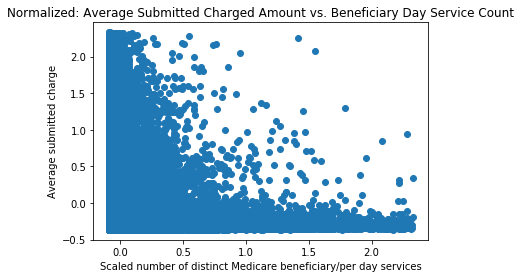

In [15]:
# Visualize data
plt.plot()
plt.title('Normalized: Average Submitted Charged Amount vs. Beneficiary Day Service Count')
plt.xlabel('Scaled number of distinct Medicare beneficiary/per day services')
plt.ylabel('Average submitted charge')
plt.scatter(dffinalarray[:,0],dfscalednooutliers.values[:,1])

### K-Means

In [16]:
# Perform K-Means multiple times to build scree plot
distortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dfscalednooutliers)
    distortions.append(sum(np.min(cdist(dffinalarray, kmeans.cluster_centers_, 'euclidean'), axis=1)) / dffinalarray.shape[0])    

Optimal K seems to be at 5


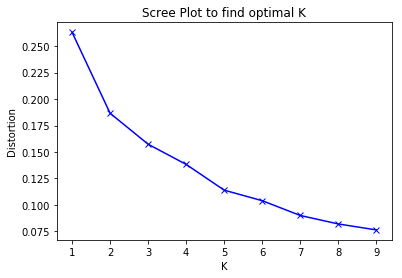

In [17]:
# Create scree plot
plt.plot()
plt.title('Scree Plot to find optimal K')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.plot(range(1,10),distortions,'bx-')
plt.show
print('Optimal K seems to be at 5')

In [ ]:
# Code below to generate silhoutte plots takes around 1h to run!
# Run cell below this one, which takes 10,000 samples for a quicker visualization
# Obtained from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#range_n_clusters = range(2,10)
#X = dffinalarray

#for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    #silhouette_avg = silhouette_score(X, cluster_labels)
    #print("For n_clusters =", n_clusters,
          #"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    #sample_silhouette_values = silhouette_samples(X, cluster_labels)

    #y_lower = 10
    #for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
       # ith_cluster_silhouette_values = \
            #sample_silhouette_values[cluster_labels == i]

        #ith_cluster_silhouette_values.sort()

       #size_cluster_i = ith_cluster_silhouette_values.shape[0]
        #y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        #ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          #0, ith_cluster_silhouette_values,
                          #facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        #ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        #y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    #ax1.set_xlabel("The silhouette coefficient values")
    #ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    #ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    #ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               # c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  #  s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
   # ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 # "with n_clusters = %d" % n_clusters),
               #  fontsize=14, fontweight='bold')

#plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7593517790397307
For n_clusters = 3 The average silhouette_score is : 0.66120949983532
For n_clusters = 4 The average silhouette_score is : 0.6688662685236808
For n_clusters = 5 The average silhouette_score is : 0.531853957281296
For n_clusters = 6 The average silhouette_score is : 0.5370468145875142
For n_clusters = 7 The average silhouette_score is : 0.4900201325846291
For n_clusters = 8 The average silhouette_score is : 0.4700790435501296
For n_clusters = 9 The average silhouette_score is : 0.476993852216123
Silhouettes show that 4, 5, or 6 would be reasonable choices for K


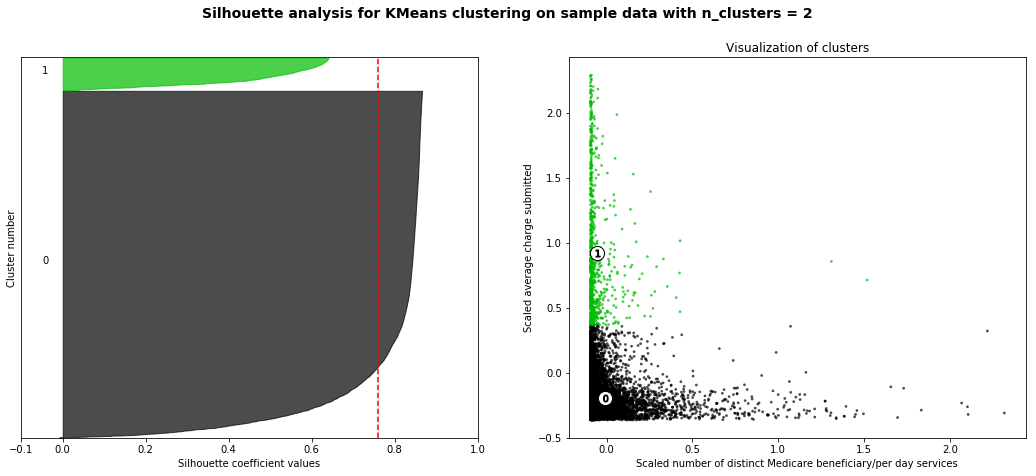

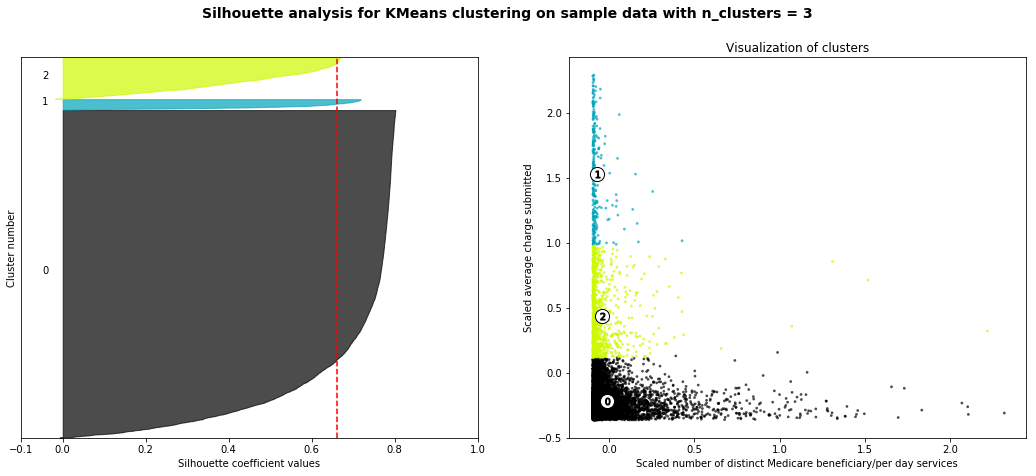

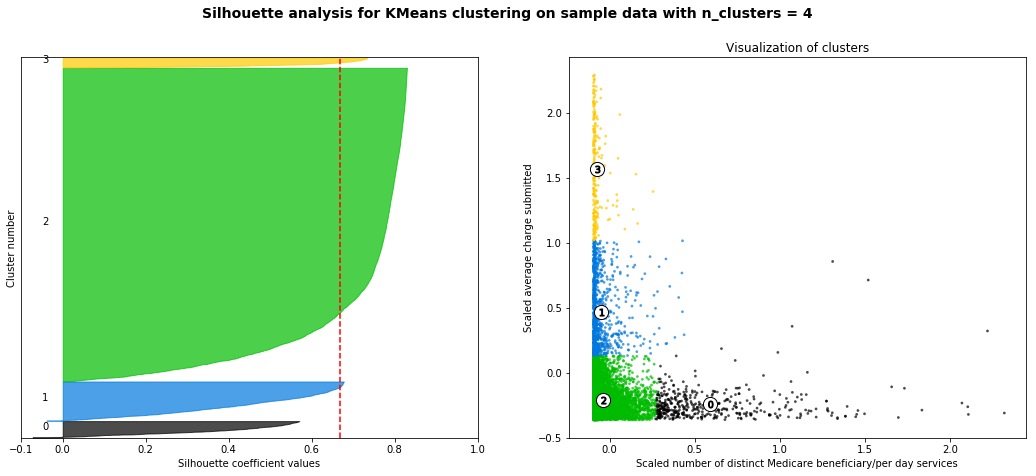

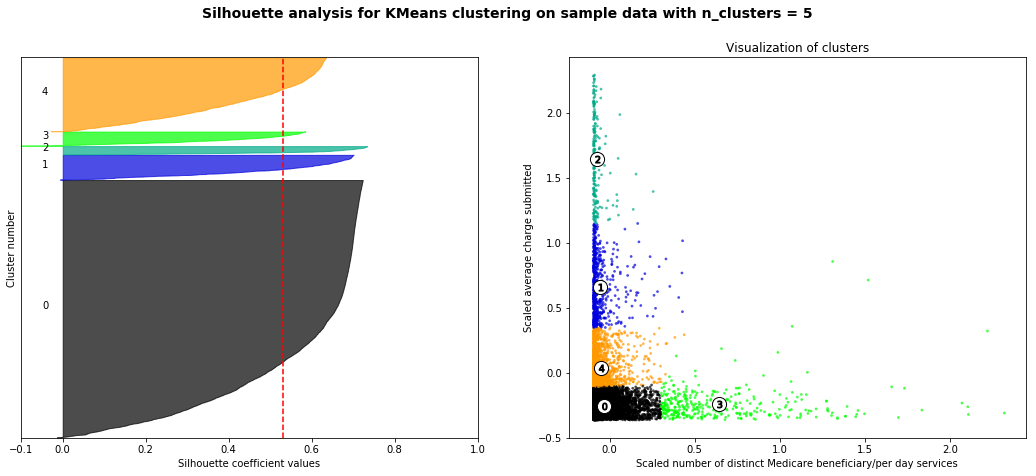

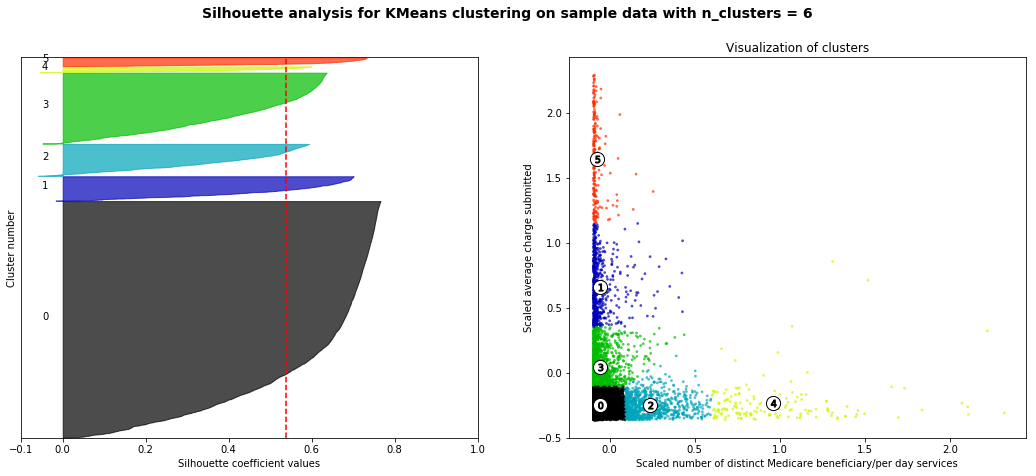

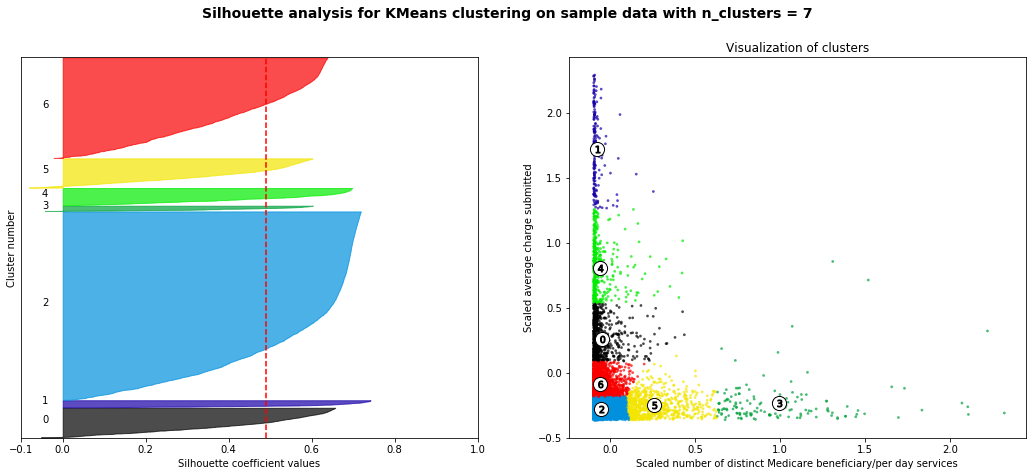

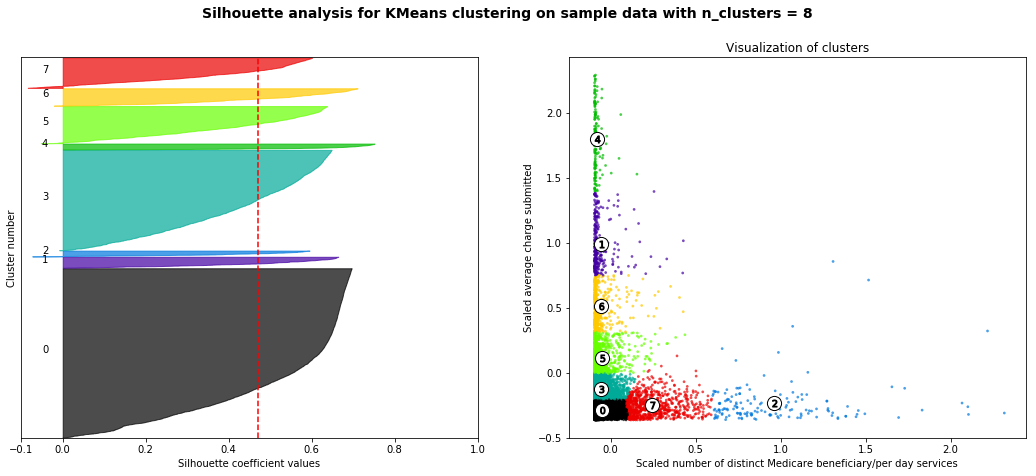

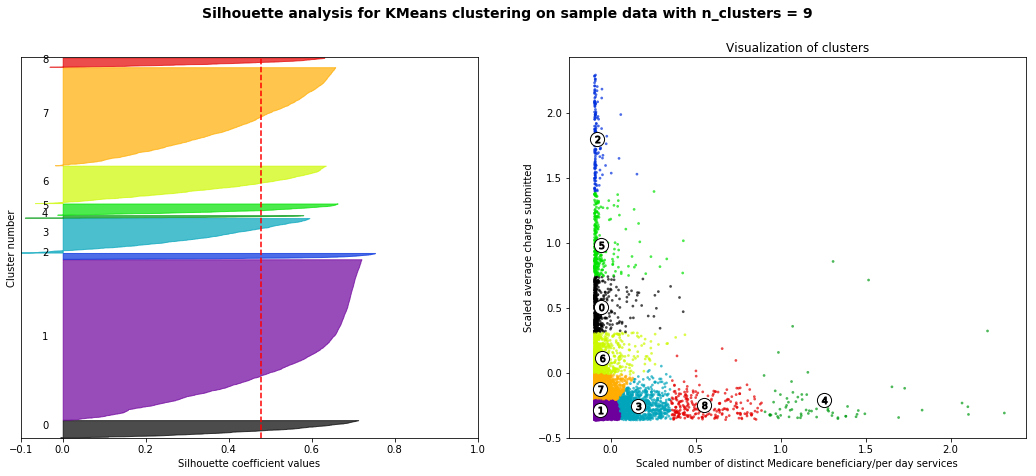

In [18]:
# Silhoutte chart with 10,000 random samples for shorter running time
range_n_clusters = range(2,10)
randomindices = np.random.randint(0,dffinalarray.shape[0],size=10000)
X = dffinalarray[randomindices]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster number")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clusters")
    ax2.set_xlabel("Scaled number of distinct Medicare beneficiary/per day services")
    ax2.set_ylabel("Scaled average charge submitted")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
print('Silhouettes show that 4, 5, or 6 would be reasonable choices for K')
plt.show()

### Code used for analysis

In [19]:
# Number of total samples
print(dfscalednooutliers.shape[0])

# Number of samples at or below average for average submitted charge
print(dfscalednooutliers.loc[dfscalednooutliers['AVERAGE_SUBMITTED_CHRG_AMT'] <= 0].shape[0])

# Number of samples at or below average of total number of services provided
print(dfscalednooutliers.loc[dfscalednooutliers['BENE_DAY_SRVC_CNT'] <= 0].shape[0])

385622
314357
305054


In [20]:
# Perform K-Mean with optimal number of clusters
kmeans = KMeans(n_clusters = 5)
kmeans.fit(dfscalednooutliers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
# Centroid locations
print(kmeans.cluster_centers_)

[[-0.03670199 -0.25523938]
 [-0.06450215  1.62724431]
 [-0.05466157  0.03516625]
 [ 0.59940356 -0.24749237]
 [-0.05388232  0.66653797]]


In [22]:
# Count of samples in each cluster (note that cluster numbers might not match those in the graph)
Counter(kmeans.labels_)

Counter({0: 258176, 1: 8367, 2: 78995, 3: 16702, 4: 23382})